# FIRST Robotics Geography: What affects team density?
A 2023 SoftDes Midterm Project

Author: Dexter Friis-hecht and Dokyun Kim

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
#Importing helper functions from another folder#
import importlib.util
spec = importlib.util.spec_from_file_location("frc_data_functions",R"../DataFromFRC/frc_data_functions.py")
fdf = importlib.util.module_from_spec(spec)
spec.loader.exec_module(fdf)
spec = importlib.util.spec_from_file_location("generate_usa_map",R"../Visualization/generate_usa_map.py")
gum = importlib.util.module_from_spec(spec)
spec.loader.exec_module(gum)
from pop_team_density_comparison import *

# Introduction

FIRST Robotics is an international robotics organization that has inspired thousands of teenagers to pursue STEM, with the majority of teams concentrated
in the United States. With the growth of the organization over time, there is value in not just geographically visualzing the teams for different years, but
also finidng the factors that drive the growth of the organization. 

With FRC having a measured impact on the number of students entering STEM, knowing how and why the organization has spread poses the opportunity to find out how such spread can be applied to other educational organizations.

We first started with FIRST... that is, we started with gathering team location data from the FIRST API. With access to this, as well as some graphing packages such
as Folium and Geopy, we can set upon our first prerequisite, getting every USA team on a map.

# Getting to know the FIRST API

In order to access information about every FRC team in the US, we need to use the official FIRST API.
We use Python's Requests library to scrape information from the FIRST API.

The code below scrapes information about ALL teams from the year 2020 and shows the first page of it.

In [ ]:
import requests as rq
from apitoken import TOKEN

url = "https://frc-api.firstinspires.org/v3.0/2020/teams?page=1"
HEADER = {
    "Is-Modified-Since": "",
}

response = rq.get(
            url=url,
            auth=TOKEN,
            headers=HEADER,
            timeout=100,
        )

print(response.text)

# Getting team info

The code above gets data from one page of a specific year.  
However, we only want the list of dictionaries that come after "teams: ", not the information in front of it.  
To isolate the list of dictionaries, we call the helper function `trim_data()` from `frc_data_functions.py`, which we imported at the top. 

To get all pages, we use a for-loop to append all data to a list, then convert it into a .csv file using the Pandas library.

In [ ]:
import pandas as pd



HEADER = {
    "Is-Modified-Since": "",
}

datalist = []
for i in range (61):
    url = f"https://frc-api.firstinspires.org/v3.0/2020/teams?page={i+1}"
    response = rq.get(
                url=url,
                auth=TOKEN,
                headers=HEADER,
                timeout=100,
            )
    datalist += fdf.trim_data(response.text)

df = pd.DataFrame(datalist)
print(df)


# Filtering the Data

We successfully isolated the teams' information, but there is still some filtering we need to do.  
As shown in the Dataframe above, there are multiple entries of `Off-Season Demo Team` that exist as placeholders.  
Also, for the scope of this project, we only want teams in the USA.

In [ ]:
only_usa = df[df.country == "USA"]
remove_demo = only_usa[only_usa.nameFull != "FIRST Off-Season Demo Team"]

print(remove_demo)

Now we have completed all the necessary steps to start visualizing the data to answer our question.

# Visualization #1: FRC Team Numbers

With all of our data, we can first check how many FRC teams there are for each year. This will allow us to easily visualize the
overall growth/decline of the organization year by year.

In [ ]:
graph_all_team_counts()

Besides 2021, where the number of FRC teams declined significantly due to Covid, the orginization has seen consistent growth over time.

# Visualization #2: FRC Heatmap / Team Location
As a pure visualizer of the data, we created two functions.
The first function plots the mainland USA teams on an interactive map. If the team had a custom 
avatar, then it was used to represent the team. Otherwise, a default FRC logo was used.
The function takes a single input, which you use to select which year you wish to visualize.
Below we use 2020, but any year can be used as long as you have the location data.

In [ ]:
usa_avatar_map = gum.usa_map_with_avatar(2020)
usa_avatar_map

Using similar notation, we can also generate a heatmap for any given year.

In [ ]:
usa_heatmap = gum.heat_map(2020)
usa_heatmap

A visual analysis of these map seemingly show a correlation between team quantity and population density.
The majoirty of teams seem situated on the east and west coast, as well as in urban clusters. Meanwhile, the midwest
is fairly sparse.

So, how much does team quantity actually correlate with population?

# Visualization #2: Population density vs. FRC density

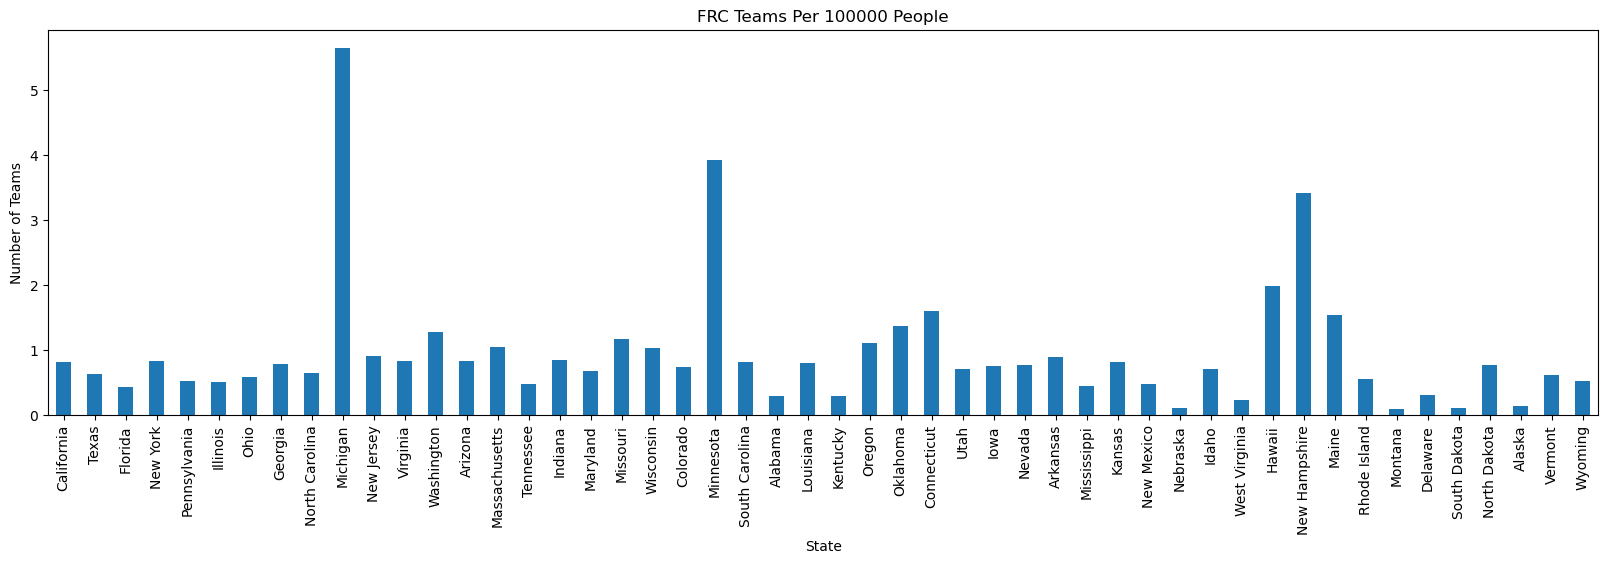

In [6]:
density_comparison = plot_density_comparison(2020)

If population was the primary determining factor for the number of teams per state, then the ratio of teams per 100,000 people would remain largely constant across all states. While this does hold true for a good number of states, there are some clear outliers, such as Michigan, Minnesota, and New Hampshire.

While the average number of teams per 100,000 people is 0.95, Michigan has 5.65 teams, Minnesota has 3.93, and New Hampshire has 3.41.

So, while population is a factor in the number of FRC teams, there is some other factor that is having a massive impact in certain states.

Well, as they say, to find your answers you have to follow the money.

# Visualization #3: Sponsor location vs. FRC density

In [2]:
usa_sponsor_map = gum.add_sponsor(usa_heatmap)

NameError: name 'gum' is not defined

Based on the map, we can see that all three of our outlier states contain some very prominent industry sponsors, such as 3M, General Motors, and Raytheon.

# Conclusions